In [23]:

mport pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Portability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Data Explanation

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Portability      3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data Visualization

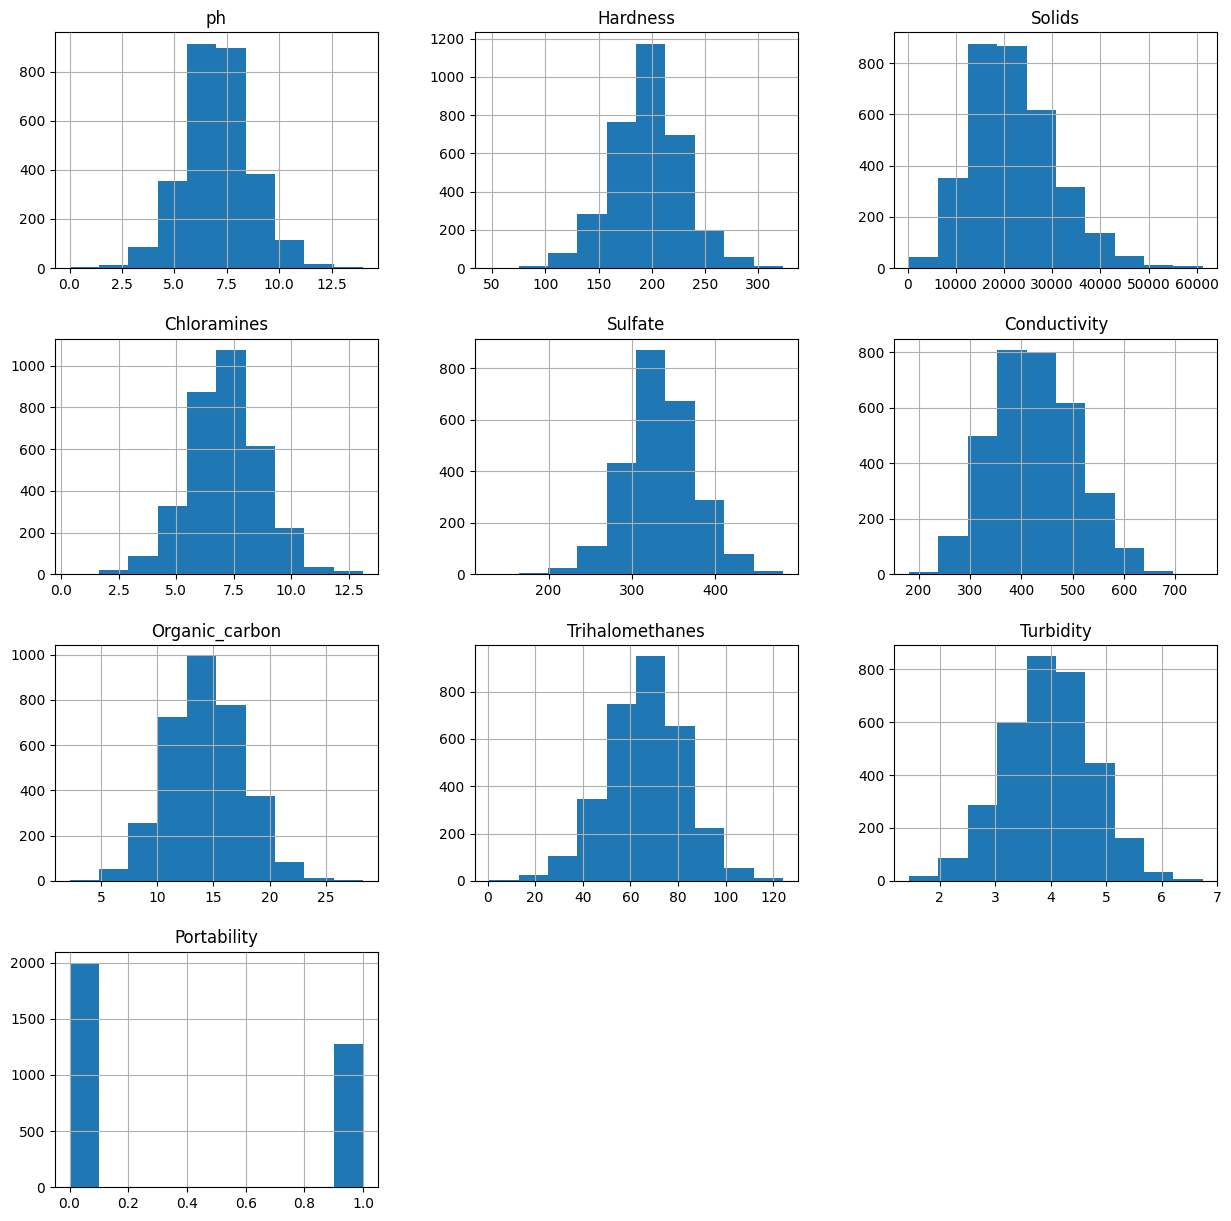

In [26]:
df.hist(figsize=(15,15))
plt.show()

#### Checking correlation of all columns

In [27]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Portability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Portability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

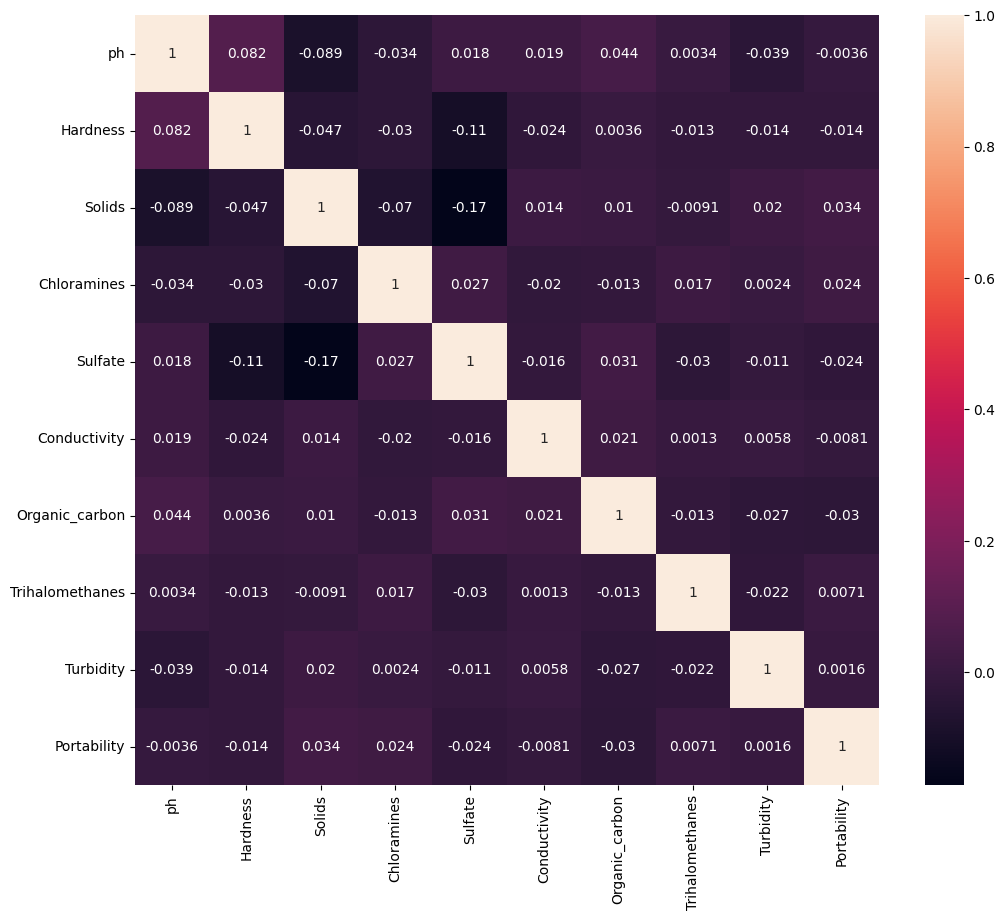

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

## Data Preprocesing

In [30]:
df[df.columns[1:]].corr()['Portability'][:].sort_values(ascending=False)


Portability        1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Portability, dtype: float64

#### Checking null values and then replacing them with median values

In [33]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Portability          0
dtype: int64

In [34]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Portability        0
dtype: int64

#### Normalizing the data using *MinMaxScaler*

In [36]:
from sklearn.model_selection import train_test_split

X=df.drop(['Portability'], axis=1)
y=df['Portability']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators=500)
modelRFC.fit(X_train,y_train)
modelRFC.score(X_test,y_test)

0.6826042726347915

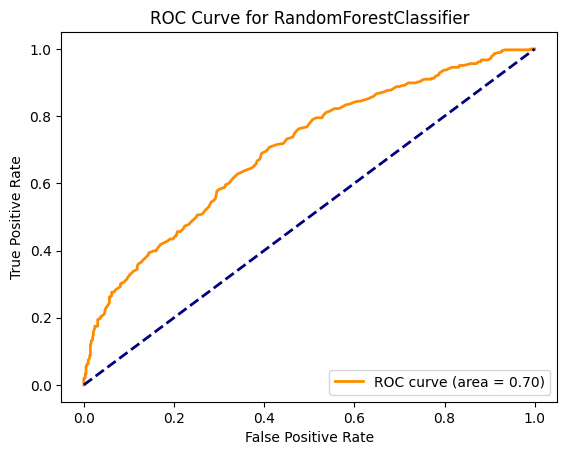

In [38]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_scores = modelRFC.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=15, leaf_size=23)
modelKNN.fit(X_train,y_train)
modelKNN.score(X_test,y_test)

0.6459816887080366

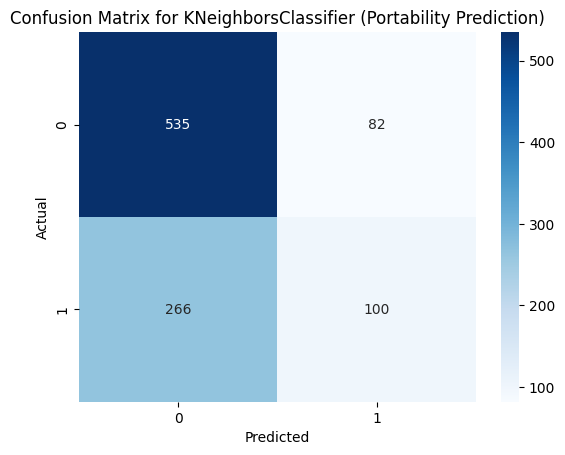

In [40]:
from sklearn.metrics import confusion_matrix

features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Portability'

X = df[features]
y = df[target]

# Get predictions on the test set
y_pred = modelKNN.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNeighborsClassifier (Portability Prediction)')
plt.show()


## Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier(n_estimators=5000)
modelGB.fit(X_train,y_train)
modelGB.score(X_test,y_test)

0.6490335707019329

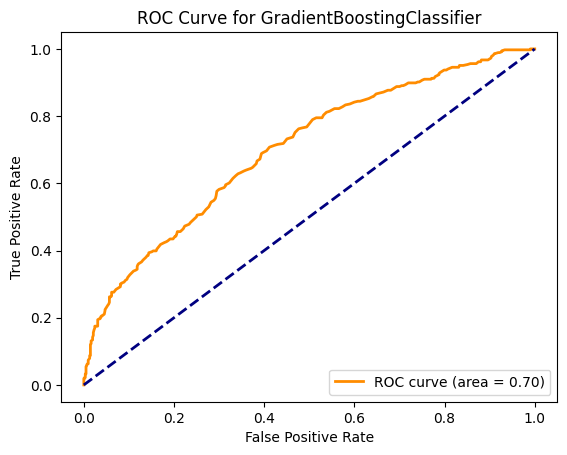

In [43]:
from sklearn.metrics import roc_curve, auc

y_scores = modelGB.decision_function(X_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GradientBoostingClassifier')
plt.legend(loc='lower right')
plt.show()

In [44]:
model = modelRFC

### Analyzing the Model

In [45]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
knn=accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.69      0.88      0.78       617
           1       0.64      0.34      0.44       366

    accuracy                           0.68       983
   macro avg       0.67      0.61      0.61       983
weighted avg       0.67      0.68      0.65       983



## Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[546,  71],
       [241, 125]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

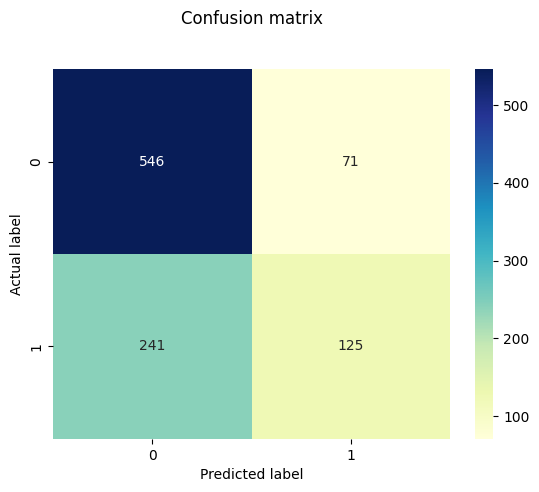

In [47]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Accuracy

In [48]:
acc = (cm[0][0] + cm[1][1]) / np.sum(cm)
print(acc)

0.6826042726347915


## Saving the Model

In [49]:
import joblib

model_filename = "model.joblib"
joblib.dump(model, model_filename)

['model.joblib']